Assignment 2
Please send the link to your github repository with the homework files to my e-mail address (daschapopowa@gmail.com) by Oct 28th

**Tasks**:

1) Take some data (it could be the results of an experiment you conducted, some fieldwork data, or anything else that could be useful for your research or work)

2) Create a database with a least two tables and save your data in it (3 points: 2 points for the code that creates a database and the .db file and 1 point for your commentary about the architecture of the database and why it fits your data)

3) Provide six different queries to your database (3 points: 1.5 points for the six queries and 1.5 points for your comments about what the queries aim to achieve)

4) Draw four different plots depicting your data (4 points: 2 points for the four plots, and 2 points for the comments about the types of plots you selected, your discussion of the results)

5) Formulate the idea for your final project -- a couple of sentences telling me what you are planning to do

**Checklist**:

*In your github repository should be*:

A file with your data

A file with the database (.db), or a link to the file with the database

A jupyter notebook file (.ipynb) with tasks 2-5 (Please, don't forget to include cells with comments).

Deadline: Oct 28th, 22.00

In [52]:
import pandas as pd
import csv
import sqlite3


**1.Take some data (it could be the results of an experiment you conducted, some fieldwork data, or anything else that could be useful for your research or work)**

I chose data on Botlikh forms from dictionaries. Let's imagine that different columns for the same contexts were filled by two different people. Both tables share the same 'id' for rows. So we can combine tables by id.

 **2.Create a database with a least two tables and save your data in it (3 points: 2 points for the code that creates a database and the .db file and 1 point for your commentary about the architecture of the database and why it fits your data)** 
 
Below is the code openning 2 tables and saving them as SQL objects, combining two tables into one by number (one of the columns). Now all iformation about every context is in the same line.

In [113]:
#openning the 1st table
import sqlite3
import csv
con = sqlite3.connect("botlikhR.db")
cur = con.cursor()
cur.execute("DROP TABLE IF EXISTS botlikhR")
cur.execute("CREATE TABLE botlikhR (N_N, Type_Host, Type_Loc, Type_Dir_cluster, Type_Dir, Type_NS, P_of_Sp, P_of_Sp_cluster, Host_Lemma, Host_Trans, HoH);")  # all the columns names

with open('Botlikh_right_commas.csv','r', encoding='utf-8') as fin:
    dr = csv.DictReader(fin)  # a comma is the default separator
    to_db = [(i['N_N'], i['Type_Host'], i['Type_Loc'], i['Type_Dir_cluster'], i['Type_Dir'], i['Type_NS'], i['P_of_Sp'], i['P_of_Sp_cluster'], i['Host_Lemma'], i['Host_Trans'], i['HoH']) for i in dr]  # put the columns' names again

cur.executemany("INSERT INTO botlikhR (N_N, Type_Host, Type_Loc, Type_Dir_cluster, Type_Dir, Type_NS, P_of_Sp, P_of_Sp_cluster, Host_Lemma, Host_Trans, HoH) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)  # and again, the names of the columns

for i in cur.execute("SELECT * FROM botlikhR"):
    print(i)
    
con.commit()
#con.close()


#openning the second table
import sqlite3
import csv
conl = sqlite3.connect("botlikhL.db")
curl = con.cursor()
curl.execute("DROP TABLE IF EXISTS botlikhL")
curl.execute("CREATE TABLE botlikhL (Number, LocclusterIPA, DirIPA, Loccluster, Form, Sample1, Source, Spatial);")  # all the columns names

with open('Botlikh_left_commmas.csv','r', encoding='utf-8') as finl:
    drl = csv.DictReader(finl)  # a comma is the default separator
    to_dbl = [(i['Number'], i['LocclusterIPA'], i['DirIPA'], i['Loccluster'], i['Form'], i['Sample1'], i['Source'], i['Spatial']) for i in drl]  # put the columns' names again

curl.executemany("INSERT INTO botlikhL (Number, LocclusterIPA, DirIPA, Loccluster, Form, Sample1, Source, Spatial) VALUES (?, ?, ?, ?, ?, ?, ?, ?);", to_dbl)  # and again, the names of the columns

for il in curl.execute("SELECT * FROM botlikhL"):
    print(il)
    
conl.commit()
#conl.close()


#Combining the tables
cur.execute ("SELECT * FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N")


('1', 'geo', '', '', 'lat', 'transformation_result', 'n', 'n', 'кьи́ри', 'мост', '')
('2', 'location_pp', '', '', '', '', 'pp_adv__n', 'pp_adv', 'бакьу__бакьи́', 'между_ среди__середина', '')
('3', 'location_pp', '', '', '', '', 'pp_adv__n', 'pp_adv', 'бакьу__бакьи́', 'между_ среди__середина', '')
('4', 'building_хозпостройки', 'in_room', 'motion towards (lat__term)', 'lat ', '', 'n', 'n', 'бе́кьи', 'хлев_ сарай', '')
('5', 'location_pp', 'near', 'motion towards (lat__term)', 'lat ', '', 'adv', 'adv', 'векьа́ру', 'рядом_ около_ поблизости', '')
('6', 'building_part', 'near', 'motion towards (lat__term)', 'lat ', '', 'n', 'n', 'бекьа́р', 'противоположная входу стена (комнаты_ огорода)', '')
('7', 'building_part', 'near', 'motion towards (lat__term)', 'lat ', '', 'n', 'n', 'бекьа́р', 'противоположная входу стена (комнаты_ огорода)', '')
('8', 'location_pp', 'near', 'absence of movement', 'ess', '', 'adv', 'adv', 'векьа́ру>бекьараду', 'рядом_ около_ поблизости>поблизости', '')
('9', 'loca

In [114]:
#printing the combined table
print(cur.fetchall())
con.commit()
#con.close()

[('1', 'ƛʼ', 'a', 'кь', 'кьи́ркьа', 'sample', 'AA', 'no', '1', 'geo', '', '', 'lat', 'transformation_result', 'n', 'n', 'кьи́ри', 'мост', ''), ('2', 'NA', 'a', 'NA', 'бакьа', 'х', 'AA', 'no', '2', 'location_pp', '', '', '', '', 'pp_adv__n', 'pp_adv', 'бакьу__бакьи́', 'между_ среди__середина', ''), ('3', 'NA', 'a', 'NA', 'бакьа', 'х', 'AA', 'no', '3', 'location_pp', '', '', '', '', 'pp_adv__n', 'pp_adv', 'бакьу__бакьи́', 'между_ среди__середина', ''), ('4', 'NA', 'a', 'NA', 'бе́кьа', 'sample', 'AA', 'yes', '4', 'building_хозпостройки', 'in_room', 'motion towards (lat__term)', 'lat ', '', 'n', 'n', 'бе́кьи', 'хлев_ сарай', ''), ('5', 'NA', 'a', 'NA', 'рекьара́', 'sample', 'AA', 'yes', '5', 'location_pp', 'near', 'motion towards (lat__term)', 'lat ', '', 'adv', 'adv', 'векьа́ру', 'рядом_ около_ поблизости', ''), ('6', 'NA', 'a', 'NA', 'бекьара́', 'sample', 'AA', 'yes', '6', 'building_part', 'near', 'motion towards (lat__term)', 'lat ', '', 'n', 'n', 'бекьа́р', 'противоположная входу стена

**3. Provide six different queries to your database (3 points: 1.5 points for the six queries and 1.5 points for your comments about what the queries aim to achieve)**

3.1. If I want to get rows with forms having 'ku' spatial suffix in the order of its various meanings. 

- I filter the data by WHERE 
- and order it with the help of GROUP BY

In [115]:
cur.execute ('SELECT *  FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE Sample1 = "sample" AND DirIPA = "ku" AND Spatial = "yes" GROUP BY Type_Dir_cluster')
print(cur.fetchall())

[('916', 'NA', 'ku', 'NA', 'аруку', 'sample', 'SA', 'yes', '916', 'deixis', '', 'fictive motion', 'abl', '', 'adv', 'adv', 'ару ', 'здесь', ''), ('67', 'ƛʼ', 'ku', 'кь', 'гьикьаду́ку', 'sample', 'AA', 'yes', '67', 'location_pp_gravitational', '', 'path', 'path', '', 'adv<DEM', 'adv', 'гьикьаду́', 'ниже', ''), ('974', 'NA', 'ku', 'NA', 'гъванику', 'sample', 'SA', 'yes', '974', 'bodypart', 'near_contact', 'prolative__prosecutive', 'prosecutive', '', 'n', 'n', 'гъва́ни', 'голова_ начало', ''), ('668', 'unclear', 'ku', 'unclear', 'хеаку', 'sample', 'SA', 'yes', '668', 'bodily_location', 'in_container', 'source', 'source', '', 'adv<n_LAT', 'adv', 'хеа', 'в рот____во рту', ''), ('1298', 'unclear', 'ku', 'unclear', 'гье́ку', 'sample', 'AA', 'yes', '1298', 'location_pp_gravitational', '', 'unclear', 'unclear', 'add', 'pp_adv<DEM', 'pp_adv', 'гьеа__гье', 'наверху__на', '')]


3.2. If I want to know the frequency of spatial meanings of the directionality marker 'ku' . 

- I filter suffix -ku in the sample

- Group meanings by the meaning of ku suffix

- count the number of each meaning

- print only the summary: types of meanings - numver of occurences

In [116]:
cur.execute ('SELECT Type_Dir_cluster, COUNT(Type_Dir_cluster) as Number_D  FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE Sample1 = "sample" AND DirIPA = "ku" AND Spatial = "yes" GROUP BY Type_Dir_cluster')
print(cur.fetchall())

[('fictive motion', 4), ('path', 36), ('prolative__prosecutive', 17), ('source', 167), ('unclear', 7)]


3.3. If I want to know what parts of speech have nonspatial meanings more often 
- I filter nonspatial meanings (where Sample1= "sample" AND Spatial = "no")
- I group the rows by parts of speech (group by P_of_Sp_cluster)
- I cound the number of occurrences of every ppart of speech (COUNT (P_of_Sp_cluster) as Number_P
- I order the outcome in a reverce order by number of occurrences (order by Number_P DESC)

In [125]:
cur.execute ('SELECT P_of_Sp_cluster, COUNT(P_of_Sp_cluster) as Number_P  FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE Sample1 = "sample" AND Spatial = "no" Group by P_of_Sp_cluster ORDER BY Number_P DESC')
print(cur.fetchall())

[('n', 236), ('pro_OBL', 30), ('pp_adv', 28), ('n_PL', 23), ('MSD', 22), ('DEM', 19), ('n_OBL', 9), ('num', 6), ('n+', 5), ('pro', 5), ('adv', 4), ('verbal forms', 4), ('DEM_OBL', 3), ('adj', 1), ('num_OBL', 1), ('unclear', 1)]


3.4. If I want to know how many unique hosts take every of the marker of directionality in its Spatial meaning
- I filter sample and spatial meanings (where Sample1= "sample" AND Spatial = "yes")
- I group the rows by suffixes of directionality
- I count the number of unique hosts for every marker (COUNT(DISTINCT Host_Lemma) as Number_L)
- For the output i need only suffixes and the number of hosts (DirIPA, COUNT(DISTINCT Host_Lemma) as Number_L)

In [134]:
cur.execute ('SELECT DirIPA, COUNT(DISTINCT Host_Lemma) as Number_L FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE Sample1 = "sample" AND Spatial = "yes" Group by DirIPA')
print(cur.fetchall())

[('NA', 221), ('a', 167), ('ku', 150), ('ru', 5)]


3.5. The same but regarding markers of localization and with ordering. 

If I want to know how many unique hosts take every of the marker of localization in its Spatial meaning

In [135]:
cur.execute ('SELECT LocclusterIPA, COUNT(DISTINCT Host_Lemma) as Number_Lo FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE Sample1 = "sample" AND Spatial = "yes" Group by LocclusterIPA ORDER BY Number_Lo DESC')
print(cur.fetchall())

[('ɬ', 169), ('χ', 74), ('ɬː', 69), ('NA', 42), ('č', 34), ('e', 32), ('ƛʼ', 20), ('unclear', 16), ('q', 5), ('u', 5), ('ƛ', 5), ('mix', 2)]


3.6. Here I compare data on marker 'ru' from two sourses (dictionaries) - if the marker is precented similarly or not (the answer is no, there is a difference)
- here I use not sample data, but full data
- I group the data by source
- I filter the suffix 'ru'
- I cound the number of forms in which ru occur by source 

In [164]:
cur.execute ('SELECT Source, COUNT(Form) as Number_Oh FROM botlikhL LEFT JOIN botlikhR ON botlikhL.Number = botlikhR.N_N WHERE DirIPA = "ru" GROUP BY Source')
print(cur.fetchall())

[('AA', 45), ('SA', 13)]


In [165]:
#closing
con.close()
conl.close()

**4. Draw four different plots depicting your data (4 points: 2 points for the four plots, and 2 points for the comments about the types of plots you selected, your discussion of the results)**


In [178]:
! pip install pandas
import pandas as pd

In [179]:
! pip install seaborn

In [195]:
import seaborn as sns

In [191]:
import matplotlib.pyplot as plt

In [196]:
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [170]:
#Openning the file

Bo_al = pd.read_csv('Botlikh_Python_all.csv', sep=',', encoding='utf-8')
Bo_al.head()

,N,Disappearing_sound,Appearing_sound,Loc_cluster_IPA,Dir_IPA,Loc_cluster,Loc,Dir,clitic_plus,Form,...,Type_Dir_cluster,Type_Dir,Type_NS,P_of_Sp,P_of_Sp_cluster,Host_Lemma,Host_Trans,Example_Verb,Example_Verb_Trans,Unnamed: 24
0,1,и,-,ƛʼ,a,кь,кь,а,NaN,кьи́ркьа,...,NaN,lat,transformation_result,n,n,кьи́ри,мост,багьи́,вздыбиться,NaN
1,2,у__и,-,NaN,a,NaN,-,а,NaN,бакьа,...,NaN,NaN,NaN,pp_adv__n,pp_adv,бакьу__бакьи́,между_ среди__середина,бухичІа́м,-,NaN
2,3,у__и,-,NaN,a,NaN,-,а,NaN,бакьа,...,NaN,NaN,NaN,pp_adv__n,pp_adv,бакьу__бакьи́,между_ среди__середина,бухичІа́м_ маса́сси,не_говори,NaN
3,4,и,-,NaN,a,NaN,-,а,NaN,бе́кьа,...,motion towards (lat__term),lat,NaN,n,n,бе́кьи,хлев_ сарай,барахха́й,вкатить,NaN
4,5,у,-,NaN,a,NaN,-,а,NaN,рекьара́,...,motion towards (lat__term),lat,NaN,adv,adv,векьа́ру,рядом_ около_ поблизости,бе́ди,подозвать,NaN


4.1. Simple pie plot that shows how many forms with suffixes of what type do we have in which dictionary

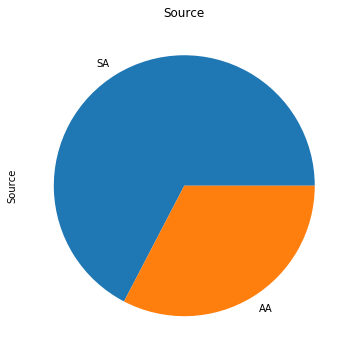

In [192]:
plt.figure(figsize=(6, 6))
Bo_al['Source'].value_counts().plot(kind='pie');
plt.title('Source');


4.2. Simple plot that shows how many markers of what type of directionality are there in the sample (the sample is filtred, then plot is built)

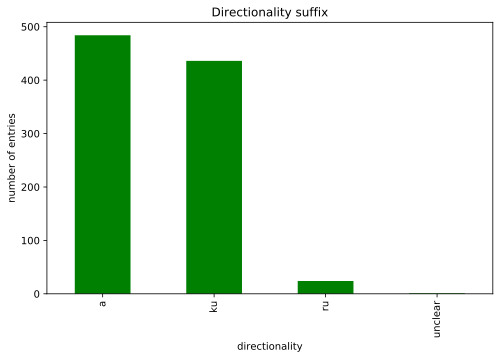

In [251]:
Bo_al[Bo_al['Sample_1'] == 'sample']['Dir_IPA'].value_counts().plot.bar(color='green'); # барплот сразу из датафрейма
plt.title('Directionality suffix')
plt.xlabel('directionality')
plt.ylabel('number of entries');

4.3. Plot that shows what markers of localization combine with what markers of directionalty in our data

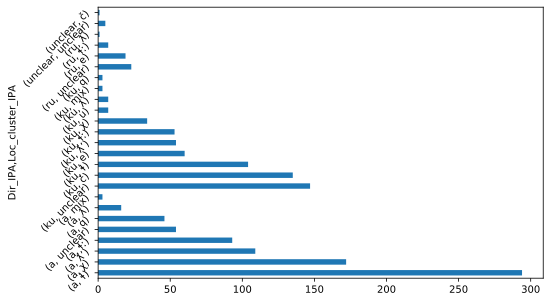

In [253]:
bobb= Bo_al.groupby(["Dir_IPA"])
hoh = bobb["Loc_cluster_IPA"].value_counts()
hoh.plot(kind='barh', rot=45)

4.4. This plot shows what meanings are coded by what suffixes in data.

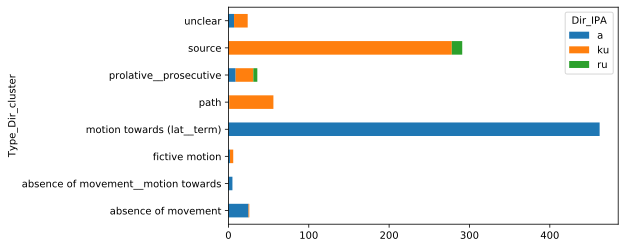

In [241]:
hohoho = pd.crosstab(index=Bo_al["Type_Dir_cluster"], 
                          columns=Bo_al["Dir_IPA"])

hohoho.plot(kind="barh", 
            figsize=(7,4),
            stacked=True)


**5 Formulate the idea for your final project -- a couple of sentences telling me what you are planning to do**

2 plans

1) I have a dictionary which I want put into a table. 

Step1: to grab all parts written in Lnguage X (Botlikh) and put it into column 1

Step2: to grab all the translations into Russian and put into column 2
In dictionary there are no punctuation marks, the boundary between the context and its translation is marked bt boldness of the text

So far:
I managed to grab all contexts in bold (with beautifil soup)
But I can't write a code for grabbing not bold part, as it is a part of the same text of the same  paragraph. I am thinking of using regulat expressions to manage this task.

2) I want to create an algorythm that would fill the set of sentences by semantic primitives for a certain word. I want to use something like SkipGram to do it. 
The table of semantic primitives for each word is a set of sentences which can define and word. For example, there are  +-20  sentences like:

- "Someone can WANT/FEEL/KNOW/__ it" 
- "it is an ANIMAL/FEELING/_",
- "A person is HAPPY/SAD when he has it" . 

In these sentences the words in bold are semantic primitives. If I manage to create an algorythm that would make a choice of one of the primitives for a certain word based on vector of that word - it would be interesting. 